In [1]:
import numpy as np

In [2]:
X = np.random.randint(0, 100, size=(100, 1))

In [3]:
X.shape

(100, 1)

In [4]:
X[:10]

array([[72],
       [21],
       [19],
       [ 3],
       [ 1],
       [54],
       [11],
       [40],
       [23],
       [70]])

In [5]:
np.random.seed(0)

In [6]:
eps = np.random.randn(X.shape[0], 1)/0.1
eps[:10]

array([[17.64052346],
       [ 4.00157208],
       [ 9.78737984],
       [22.40893199],
       [18.6755799 ],
       [-9.7727788 ],
       [ 9.50088418],
       [-1.51357208],
       [-1.03218852],
       [ 4.10598502]])

In [7]:
eps.T.dot(eps)

array([[10194.03617937]])

In [8]:
a1 = 3.2
a0 = 0.4

In [9]:
# eps = 0

In [10]:
y = a1 * X + a0 + eps
y.shape

(100, 1)

In [11]:
y[:10]

array([[248.44052346],
       [ 71.60157208],
       [ 70.98737984],
       [ 32.40893199],
       [ 22.2755799 ],
       [163.4272212 ],
       [ 45.10088418],
       [126.88642792],
       [ 72.96781148],
       [228.50598502]])

In [12]:
import matplotlib.pyplot as plt

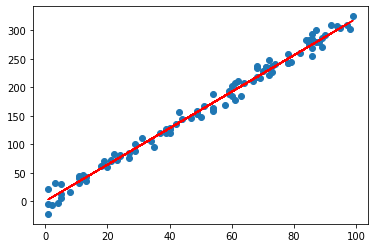

In [13]:
plt.scatter(X, y)
plt.plot(X, a1*X + a0, color='red')
plt.show()

In [14]:
a1, a0

(3.2, 0.4)

# use scikit learn

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X, y)

LinearRegression()

In [18]:
lr.coef_, lr.intercept_

(array([[3.23246072]]), array([-0.65417031]))

In [19]:
a1, a0

(3.2, 0.4)

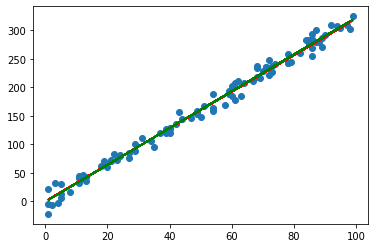

In [20]:
plt.scatter(X, y)
plt.plot(X, a1*X + a0, color='red')
plt.plot(X, lr.coef_*X + lr.intercept_, color='green')
plt.show()

# recover without scikit learn

In [21]:
np.random.seed(3)

In [22]:
b0 = np.random.randn()
b0

1.7886284734303186

In [23]:
b1 = np.random.randn()
b1

0.43650985051198943

In [24]:
a0, a1

(0.4, 3.2)

In [25]:
theta_a = np.array([a0, a1]).reshape(1, 2)
theta_b = np.array([b0, b1]).reshape(1, 2)

In [26]:
theta_a, theta_b

(array([[0.4, 3.2]]), array([[1.78862847, 0.43650985]]))

In [27]:
X_b = np.c_[np.ones((100, 1)), X]

In [28]:
X_b[:10]

array([[ 1., 72.],
       [ 1., 21.],
       [ 1., 19.],
       [ 1.,  3.],
       [ 1.,  1.],
       [ 1., 54.],
       [ 1., 11.],
       [ 1., 40.],
       [ 1., 23.],
       [ 1., 70.]])

In [29]:
X_b.shape

(100, 2)

In [30]:
theta_a.shape, theta_b.shape, y.shape

((1, 2), (1, 2), (100, 1))

In [31]:
res_a = X_b.dot(theta_a.T) - y
res_a.shape

(100, 1)

In [32]:
res_a[:10]

array([[-17.64052346],
       [ -4.00157208],
       [ -9.78737984],
       [-22.40893199],
       [-18.6755799 ],
       [  9.7727788 ],
       [ -9.50088418],
       [  1.51357208],
       [  1.03218852],
       [ -4.10598502]])

In [33]:
loss_a = res_a.T.dot(res_a)
loss_a

array([[10194.03617937]])

In [34]:
res_b = X_b.dot(theta_b.T) - y
res_b[:10]

array([[-215.22318575],
       [ -60.64623675],
       [ -60.90506421],
       [ -29.31077397],
       [ -20.05044158],
       [-138.0670608 ],
       [ -38.51064735],
       [-107.63740542],
       [ -61.13945645],
       [-196.16166701]])

In [35]:
loss_b = res_b.T.dot(res_b)
loss_b

array([[2627550.72476344]])

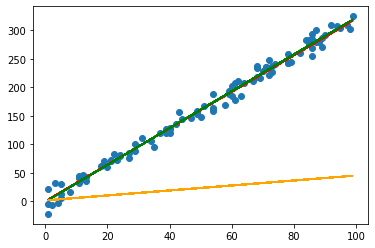

In [36]:
plt.scatter(X_b[:,1], y)
plt.plot(X_b[:,1], X_b.dot(theta_a.T), color='red')
plt.plot(X_b[:,1], X_b[:,1]*lr.coef_[0] + lr.intercept_, color='green')
plt.plot(X_b[:,1], X_b.dot(theta_b.T), color='orange')

In [37]:
def step(theta_b, alpha):
    d_theta = (y - X_b.dot(theta_b.T)) * X_b / X_b.shape[0]
    
    theta_b += alpha * np.sum(d_theta, axis=0).reshape(1, 2)

    plt.scatter(X_b[:,1], y)
    plt.plot(X_b[:,1], X_b.dot(theta_a.T), color='red')
    plt.plot(X_b[:,1], X_b[:,1]*lr.coef_[0] + lr.intercept_, color='green')
    plt.plot(X_b[:,1], X_b.dot(theta_b.T), color='orange')

    res_b = X_b.dot(theta_b.T) - y
    loss_b = res_b.T.dot(res_b)
    return theta_b, theta_a, loss_b

In [38]:
theta_b.shape

(1, 2)

In [39]:
theta_b

array([[1.78862847, 0.43650985]])

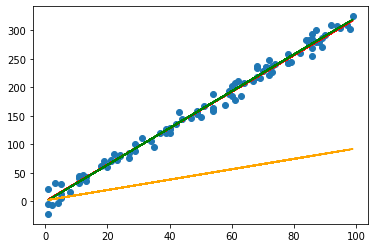

In [40]:
theta_b, theta_a, loss = step(theta_b, 5.0e-5)

[[1.82402807 2.84901187]] [[0.4 3.2]] [[51537.23626597]]


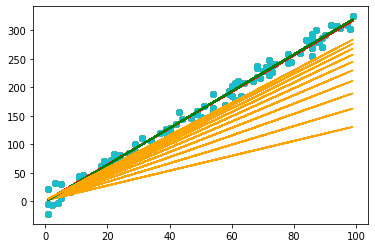

In [41]:
for i in range(10):
    theta_b, theta_a, loss = step(theta_b, 5.0e-5)
print(theta_b, theta_a, loss)

[[1.82839678 3.18519234]] [[0.4 3.2]] [[10258.69298345]]


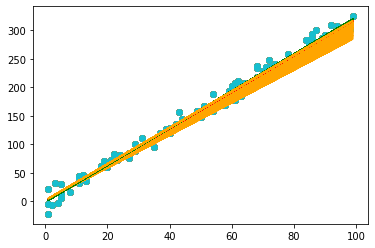

In [42]:
for i in range(100):
    theta_b, theta_a, loss = step(theta_b, 1.0e-5)
print(theta_b, theta_a, loss)

[[1.82839594 3.18554755]] [[0.4 3.2]] [[10256.17351609]]


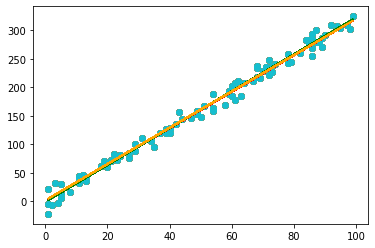

In [43]:
for i in range(10):
    theta_b, theta_a, loss = step(theta_b, 1.0e-6)
print(theta_b, theta_a, loss)